# Trabajo práctico 3: forma y función en el universo Pokémon

Los Pokémon son una clase de criaturas fantásticas inspiradas en animales reales, insectos, objetos, plantas o criaturas mitológicas con un sistema de evolución lamarckiano. Se originan en una serie de videojuegos iniciada en el año 1996. En estos juegos, cada personaje posee un conjunto de Pokémones, cada uno con distintas habilidades y poderes, y su objetivo es enfrentarlos a los Pokémones de distintos rivales.

Entre otros atributos, los Pokémon se caracterizan por sus puntos de salud (HP), los cuales determinan su resistancia ante ataques, su poder de ataque, su poder de defensa, y su velocidad. A mayor valor de estos atributos, más poderoso el Pokémon en cuestión. Algunos pocos Pokémon seleccionados pertenecen a la categoría de "legendarios" y típicamente son los más poderosos de todos.

El objetivo de este TP es clasificar a los Pokémon de acuerdo a su aspecto físico (forma) y luego evaluar si esta clasificación se asocia a características especiales de los Pokémon (función). ¿Son los Pokémon más grandes más poderosos? ¿Y los más pequeños, más rápidos? ¿Qué aspecto suelen tener los Pokémon legendarios?

Para ello, partimos de dos fuentes de datos. El aspecto de los Pokémon está dado por sus *sprites* (matrices numéricas).

Los datos están disponibles en este directorio de Drive: https://drive.google.com/drive/folders/1YwkHKpeJsnm6h5usrfQPs0qWzDHDmmO5?usp=sharing

Cargamos archivos que tienen los nombres y los *sprites*:


In [ ]:
from google.colab import drive
import pickle
import pandas as pd
import numpy as np

drive.mount('/content/drive', force_remount=True)

filename = '/content/drive/My Drive/LaboDatos2022/TerceraEjercitacion/pokemon_imagenes.p'

file = open(filename, 'rb')
data = pickle.load(file)
file.close()

nombres= data['nombres']
imagenes = data['imagenes']

Mounted at /content/drive


La variable *nombres* es una lista con los nombres mientras que imagenes tiene los *sprites* correspondientes, en el mismo orden. Podemos examinarlos uno por uno:

espeon
(56, 68)


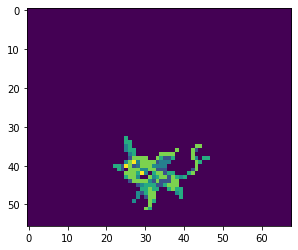

In [ ]:
import matplotlib.pyplot as plt

n=100# elijo el número de Pokémon que quiero visualizar
plt.imshow(imagenes[n])
print(nombres[n]) # nombre del Pokémon
print(imagenes[n].shape) # tamaño del sprite (todos tienen el mismo tamaño)

Por otro lado, la información sobre los atributos de cada Pokémon (función) esta en un dataframe aparte:

In [ ]:
filename = '/content/drive/My Drive/LaboDatos2022/TerceraEjercitacion/pokemon_dataframe.csv'
df = pd.read_csv(filename)
df.head()

,Unnamed: 0,level_0,index,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,0,0,0,1,bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,1,1,1,2,ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,2,2,2,3,venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,3,4,4,charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,4,4,5,5,charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False


Para poder trabajar con algoritmos de reducción de la dimensión y clustering, primero tenemos que representar los datos de sprites como una matriz, para eso tenemos que "desenrollarlos" como vimos en clase:

In [ ]:
data = np.zeros((len(nombres),56*68))

for n,img in enumerate(imagenes):
  img.resize(56*68)
  data[n,:] = img


Los enunciados del TP 3 son los siguientes:

1.   Usar el criterio de la Silueta para verificar que hay un máximo local cerca de k=8 clusters. Aplicar el algoritmo kmeans con k=8 clusters sobre los datos de *sprites* (matriz *data*).
2.   Visualizar las primeras dos componentes de la matriz de *sprites*, pintando con un color distinto los datos que pertenezcan a cada cluster, e indicando con cruces la posición de los centroides (ayuda: el código para hacer esto se encuentra en el notebook de clustering que vimos en clase).
3.   Visualizar los primeros 10 elementos de cada cluster.
4.   En un mismo gráfico de barras, mostrar el valor promedio de los atributos *HP*, *Attack*, *Defense* y *Speed* de cada cluster. ¿Cuál es el cluster de Pokémones más fuertes?
5.   Hacer lo mismo que en el ítem anterior, pero con el tamaño promedio de los Pokémones por cluster (el tamaño se define como la cantidad de entradas no vacías en la fila correspondiente al *sprite* de ese Pokémon en la matriz data). ¿Son los Pokémones más grandes los más fuertes?
6.   Hacer gráficos de torta con la proporción de Pokémones legendarios/no legendarios por cluster. ¿Tiene el cluster de Pokémones más fuertes más legendarios que los otros?

**Optativo**

7.   Entrenar, evaluar y determinar la performance de un modelo de aprendizaje supervisado para predecir alguna característica de los Pokémones en base a sus *sprites*. Puede ser, por ejemplo, un modelo de regresión (predecir *HP*, *Attack*, *Defense*, *Speed*), un modelo de clasificación binaria (legendario o no legendario), o un modelo de clasificación multiclase (tipo del Pokémon: tierra, hielo, agua, fuego, etc).
